In [ ]:
import os
import sys
from scgt import GeoTiff
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/')
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/ecoscape-connectivity/')
from EcoLinker.EcoLinker.restorationOptimizer import restorationOptimizer, defecitRestoration, lowResDefecitRestoration, probalisticDeficitRestoration, noisyDefecitRestoration, utopianRestoration, flowRestoration, lowResFlowRestoration, greedyFlowRestoration, bfsFlowRestoration
from ecoscape_connectivity_local import repopulation, util
import matplotlib.pyplot as plt
import ecoscape_connectivity
from scgt import GeoTiff, Tile
import numpy as np
import torch
import rasterio

In [ ]:
DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
HABITAT_PATH = os.path.join(DATA_PATH, "smol/hab_smol.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "smol/terrain.tif")
RESTORED_TERRAIN_PATH = os.path.join(DATA_PATH, "smol/restored_ter_smol.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop.tif")
RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_after_restoration.tif")
FLOW_PATH = os.path.join(DATA_PATH, "smol/grad.tif")
DEATH_PATH = os.path.join(DATA_PATH, "smol/death.tif")
RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_after_restoration.tif")
LOW_RES_FLOW_PATH = os.path.join(DATA_PATH, "smol/flow_low_res.tif")

unrestorable = [104,500, 501, 502, 503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,900, 901, 902, 903, 904, 905, 906,907,980,981,982,983,984,985,986,909,910,1000,1001,1002,1003,1004,1100,1101,1111,1112,1102,1103,1104,1105,1106,1200,1201,1202,1203,1204,1205,1206,1207,1300,1301,1302,1303,1304,1305,    1402]

with GeoTiff.from_file(HABITAT_PATH) as hab:
    hab_mat = hab.get_all_as_tile().m.squeeze(0)

flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, hab_mat, unrestorable)
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50)
greedyFlowOptimizer = greedyFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50)
bfsFlowOptimizer = bfsFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50)

In [ ]:
with GeoTiff.from_file(TERRAIN_PATH) as terr:
    print(terr.dataset)

In [6]:
# limited greedy Flow restoration
bfsFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = bfsFlowOptimizer.restore()
print(bfsFlowOptimizer.changed_pixels)
bfsFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {bfsFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Connectivity/permiability_restored: {round(bfsFlowOptimizer.get_delta_connectivity()/permiability_restored, 2)}")
print(f"Connectivity/pixels restored: {round(bfsFlowOptimizer.get_delta_connectivity()/bfsFlowOptimizer.pixels, 2)}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(277, 36): 78, (43, 72): 76, (41, 74): 75, (176, 109): 74, (188, 108): 73, (245, 102): 73, (155, 139): 73, (203, 115): 72, (278, 36): 72, (277, 37): 33, (44, 73): 69, (42, 74): 65, (175, 109): 68, (187, 108): 44, (244, 102): 61, (202, 115): 69, (279, 35): 32, (45, 73): 69, (43, 75): 70, (174, 109): 47, (187, 107): 28, (245, 103): 42, (201, 115): 66, (46, 73): 66, (44, 75): 70, (173, 109): 52, (186, 106): 45, (201, 114): 52, (46, 74): 55, (44, 76): 49, (172, 109): 59, (185, 105): 19, (200, 114): 44, (45, 76): 46, (171, 108): 45, (46, 76): 34, (171, 109): 43, (171, 110): 40, (171, 111): 45, (42, 75): 60, (41, 75): 32, (268, 79): 70, (269, 79): 65, (270, 79): 61, (271, 79): 52, (272, 79): 50, (272, 80): 42, (134, 141): 70, (133, 141): 65, (271, 87): 70}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 22100
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 4428.09
Connectivity/pixels restored: 442.0


In [4]:
print(bfsFlowOptimizer.changed_pixels)

{(277, 36): 78, (43, 72): 76, (41, 74): 75, (176, 109): 74, (188, 108): 73, (245, 102): 73, (155, 139): 73, (203, 115): 72, (278, 36): 72, (44, 75): 70, (277, 37): 33, (44, 73): 69, (42, 74): 65, (175, 109): 68, (187, 108): 44, (244, 102): 61, (202, 115): 69, (279, 35): 32, (43, 75): 70, (45, 73): 69, (42, 75): 60, (174, 109): 47, (187, 107): 28, (245, 103): 42, (201, 115): 66, (44, 76): 49, (46, 73): 66, (41, 75): 32, (173, 109): 52, (186, 106): 45, (201, 114): 52, (45, 76): 46, (46, 74): 55, (172, 109): 59, (185, 105): 19, (44, 74): 20, (46, 75): 51, (171, 108): 45, (45, 75): 42, (47, 74): 46, (171, 109): 43, (46, 76): 34, (48, 73): 51, (171, 110): 40, (47, 75): 45, (171, 111): 45, (48, 75): 45, (47, 76): 41, (48, 76): 34, (268, 79): 70}


In [7]:
TERRAIN_CHANGED_BFS = os.path.join(DATA_PATH, "smol/changed_terrain_flow_bfs.tif")
CONNECTIVITY_DIFF_BFS = os.path.join(DATA_PATH, "smol/connectivity_diff_flow_bfs.tif")

# paint changed terrain pixels
bfsFlowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_BFS, value=1)
# view diff of before and after
bfsFlowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_BFS)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [3]:
# limited greedy Flow restoration
greedyFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = greedyFlowOptimizer.restore()
greedyFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {greedyFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Connectivity/permiability_restored: {round(greedyFlowOptimizer.get_delta_connectivity()/permiability_restored, 2)}")
print(f"Connectivity/pixels restored: {round(greedyFlowOptimizer.get_delta_connectivity()/greedyFlowOptimizer.pixels, 2)}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 14662
Permiability Restored: 5.099999999999998
Connectivity/permiability_restored: 2874.9
Connectivity/pixels restored: 293.24


In [4]:
TERRAIN_CHANGED_GREEDY = os.path.join(DATA_PATH, "smol/changed_terrain_flow_greedy.tif")
CONNECTIVITY_DIFF_GREEDY = os.path.join(DATA_PATH, "smol/connectivity_diff_flow_greedy.tif")

# paint changed terrain pixels
greedyFlowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_GREEDY, value=1)
# view diff of before and after
greedyFlowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_GREEDY)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


# Flow based restoration

In [50]:
# Flow restoration
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50) #hab_mat, unrestorable)

flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = flowOptimizer.restore()
flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {flowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {flowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {round(flowOptimizer.get_delta_connectivity()/permiability_restored, 2)}")
print(f"Connectivity/pixels restored: {round(flowOptimizer.get_delta_connectivity()/flowOptimizer.pixels, 2)}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 46193
Permiability Restored: 4.990861313868612
Percent connectivity changed: 0.024354995692414113%
Connectivity/permiability_restored: 9255.52


In [8]:
# Flow restoration
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50) #hab_mat, unrestorable)

flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=60)
permiability_restored = flowOptimizer.restore()
flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=False)
flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {flowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {flowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {round(flowOptimizer.get_delta_connectivity()/permiability_restored, 2)}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


KeyboardInterrupt: 

In [6]:
# Flow restoration
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50) #hab_mat, unrestorable)

# flowOptimizer.run_connectivity()
permiability_restored = flowOptimizer.restore()
flowOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {flowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {flowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {flowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 15522
Permiability Restored: 4.999999999999998
Percent connectivity changed: 0.005763508990026924%
Connectivity/permiability_restored: 3104.400000000001


In [7]:
print(flowOptimizer.changed_pixels)

{(277, 36): 79, (278, 36): 71, (103, 117): 69, (188, 108): 67, (89, 132): 66, (11, 115): 66, (176, 109): 65, (155, 139): 64, (248, 143): 63, (15, 115): 63, (250, 141): 63, (15, 113): 63, (143, 87): 63, (118, 145): 63, (109, 142): 63, (220, 198): 63, (183, 173): 62, (176, 174): 62, (277, 118): 62, (104, 66): 62, (270, 33): 62, (199, 159): 62, (21, 102): 62, (163, 105): 62, (216, 114): 62, (45, 25): 61, (41, 85): 61, (190, 175): 61, (204, 109): 61, (23, 102): 61, (270, 32): 60, (267, 188): 60, (283, 38): 60, (271, 40): 60, (289, 131): 60, (186, 114): 60, (236, 197): 60, (177, 174): 60, (95, 103): 60, (41, 74): 59, (43, 72): 59, (163, 89): 59, (109, 141): 59, (276, 146): 59, (245, 102): 59, (22, 102): 59, (226, 162): 59, (119, 145): 59, (198, 160): 59, (205, 205): 59}


In [48]:
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol/changed_terrain_low_flow.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol/connectivity_diff_low_flow.tif")

def get_connectivity_difference_tif(flowOptimizer, connectivity_diff_fn):
    # get origional connectivity
    with GeoTiff.from_file(flowOptimizer.connectivity_fn) as connectivity_tif:
        connectivity_tile = connectivity_tif.get_all_as_tile()
        # create connectivity diff tif from clone of connectivity_tif
        connectivity_tif.clone_shape(connectivity_diff_fn, dtype='int16')

    # get restored connectivity
    with GeoTiff.from_file(flowOptimizer.restored_connectivity_fn) as restored_connectivity_tif:
        restored_connectivity_tile = restored_connectivity_tif.get_all_as_tile()

    # get the difference of the two in a tile
    diff = Tile(connectivity_tile.w, connectivity_tile.h, connectivity_tile.b, connectivity_tile.c, connectivity_tile.x, connectivity_tile.y, (restored_connectivity_tile.m.astype('int16') - connectivity_tile.m.astype('int16')))
    # write the tile to connectivity diff tif
    with GeoTiff.from_file(connectivity_diff_fn) as connectivity_diff:
        connectivity_diff.set_tile(diff)


# paint changed terrain pixels
flowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, flowOptimizer.changed_pixels, value=1)
# view diff of before and after
get_connectivity_difference_tif(flowOptimizer, CONNECTIVITY_DIFF_UTOPIAN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [6]:
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50) #hab_mat, unrestorable)

perm_results = {}
pix_results = {}
for gap_crossing in [2]:
    for num_gaps in [35,38,40,42,45]:
        flowOptimizer.run_connectivity(gap_crossing=gap_crossing, num_gaps=num_gaps)
        permiability_restored = flowOptimizer.restore()
        flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=False)
        flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
        print(f'gap_crossing {gap_crossing}, num_gaps {num_gaps}')
        print(f"Delta connectivity: {flowOptimizer.get_delta_connectivity()}")
        print(f"Permiability Restored: {permiability_restored}")
        print(f"Connectivity/permiability_restored: {flowOptimizer.get_delta_connectivity()/permiability_restored}")
        print(f"Connectivity/pixels restored: {flowOptimizer.get_delta_connectivity()/flowOptimizer.pixels}")
        perm_results[(gap_crossing, num_gaps)] = flowOptimizer.get_delta_connectivity()/permiability_restored
        pix_results[(gap_crossing, num_gaps)] = flowOptimizer.get_delta_connectivity()/permiability_restored

        TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, f"smol/changed_terrain_flow_{gap_crossing}_{num_gaps}.tif")
        CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, f"smol/connectivity_diff_flow_{gap_crossing}_{num_gaps}.tif")

        # paint changed terrain pixels
        flowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, value=1)
        # view diff of before and after
        flowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)
print(perm_results)
print(pix_results)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 2, num_gaps 35
Delta connectivity: 44092
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 8834.547230851134
Connectivity/pixels restored: 881.84


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 2, num_gaps 38
Delta connectivity: 45034
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 9023.292207070444
Connectivity/pixels restored: 900.68


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 2, num_gaps 40
Delta connectivity: 46193
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 9255.516652333903
Connectivity/pixels restored: 923.86


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 2, num_gaps 42
Delta connectivity: 44938
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 9004.057050258285
Connectivity/pixels restored: 898.76


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 2, num_gaps 45
Delta connectivity: 44647
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 8945.750481171428
Connectivity/pixels restored: 892.94


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(2, 35): 8834.547230851134, (2, 38): 9023.292207070444, (2, 40): 9255.516652333903, (2, 42): 9004.057050258285, (2, 45): 8945.750481171428}
{(2, 35): 8834.547230851134, (2, 38): 9023.292207070444, (2, 40): 9255.516652333903, (2, 42): 9004.057050258285, (2, 45): 8945.750481171428}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [5]:
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50) #hab_mat, unrestorable)

perm_results = {}
pix_results = {}
for gap_crossing in [1, 2,4,6]:
    for num_gaps in [20,40,60,80]:
        flowOptimizer.run_connectivity(gap_crossing=gap_crossing, num_gaps=num_gaps)
        permiability_restored = flowOptimizer.restore()
        flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=False)
        flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
        print(f'gap_crossing {gap_crossing}, num_gaps {num_gaps}')
        print(f"Delta connectivity: {flowOptimizer.get_delta_connectivity()}")
        print(f"Permiability Restored: {permiability_restored}")
        print(f"Connectivity/permiability_restored: {flowOptimizer.get_delta_connectivity()/permiability_restored}")
        print(f"Connectivity/pixels restored: {flowOptimizer.get_delta_connectivity()/flowOptimizer.pixels}")
        perm_results[(gap_crossing, num_gaps)] = flowOptimizer.get_delta_connectivity()/permiability_restored
        pix_results[(gap_crossing, num_gaps)] = flowOptimizer.get_delta_connectivity()/permiability_restored

        TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, f"smol/changed_terrain_flow_{gap_crossing}_{num_gaps}.tif")
        CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, f"smol/connectivity_diff_flow_{gap_crossing}_{num_gaps}.tif")

        # paint changed terrain pixels
        flowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, value=1)
        # view diff of before and after
        flowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)
print(perm_results)
print(pix_results)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 1, num_gaps 20
Delta connectivity: 9380
Permiability Restored: 4.999999999999998
Connectivity/permiability_restored: 1876.0000000000007
Connectivity/pixels restored: 187.6


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 1, num_gaps 40
Delta connectivity: 14589
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 2923.1427367977685
Connectivity/pixels restored: 291.78


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 1, num_gaps 60
Delta connectivity: 14525
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 2910.319298922996
Connectivity/pixels restored: 290.5


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 1, num_gaps 80
Delta connectivity: 17420
Permiability Restored: 4.981722627737225
Connectivity/permiability_restored: 3496.782398724682
Connectivity/pixels restored: 348.4


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 2, num_gaps 20
Delta connectivity: 39509
Permiability Restored: 4.981722627737225
Connectivity/permiability_restored: 7930.790803169544
Connectivity/pixels restored: 790.18


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 2, num_gaps 40
Delta connectivity: 46193
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 9255.516652333903
Connectivity/pixels restored: 923.86


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 2, num_gaps 60
Delta connectivity: 43375
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 8690.884653410323
Connectivity/pixels restored: 867.5


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 2, num_gaps 80
Delta connectivity: 38185
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 7650.983988252984
Connectivity/pixels restored: 763.7


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 4, num_gaps 20
Delta connectivity: 12542
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 2512.993091021839
Connectivity/pixels restored: 250.84


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 4, num_gaps 40
Delta connectivity: 9386
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 1880.6373108221162
Connectivity/pixels restored: 187.72


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 4, num_gaps 60
Delta connectivity: 9260
Permiability Restored: 4.990861313868612
Connectivity/permiability_restored: 1855.3911675061577
Connectivity/pixels restored: 185.2


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 4, num_gaps 80
Delta connectivity: 9706
Permiability Restored: 4.981722627737225
Connectivity/permiability_restored: 1948.3220414478624
Connectivity/pixels restored: 194.12


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 6, num_gaps 20
Delta connectivity: 8023
Permiability Restored: 4.999999999999998
Connectivity/permiability_restored: 1604.6000000000006
Connectivity/pixels restored: 160.46


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 6, num_gaps 40
Delta connectivity: 1972
Permiability Restored: 4.999999999999998
Connectivity/permiability_restored: 394.40000000000015
Connectivity/pixels restored: 39.44


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 6, num_gaps 60
Delta connectivity: 6662
Permiability Restored: 4.999999999999998
Connectivity/permiability_restored: 1332.4000000000005
Connectivity/pixels restored: 133.24


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

gap_crossing 6, num_gaps 80
Delta connectivity: 5043
Permiability Restored: 4.999999999999998
Connectivity/permiability_restored: 1008.6000000000004
Connectivity/pixels restored: 100.86


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(1, 20): 1876.0000000000007, (1, 40): 2923.1427367977685, (1, 60): 2910.319298922996, (1, 80): 3496.782398724682, (2, 20): 7930.790803169544, (2, 40): 9255.516652333903, (2, 60): 8690.884653410323, (2, 80): 7650.983988252984, (4, 20): 2512.993091021839, (4, 40): 1880.6373108221162, (4, 60): 1855.3911675061577, (4, 80): 1948.3220414478624, (6, 20): 1604.6000000000006, (6, 40): 394.40000000000015, (6, 60): 1332.4000000000005, (6, 80): 1008.6000000000004}
{(1, 20): 1876.0000000000007, (1, 40): 2923.1427367977685, (1, 60): 2910.319298922996, (1, 80): 3496.782398724682, (2, 20): 7930.790803169544, (2, 40): 9255.516652333903, (2, 60): 8690.884653410323, (2, 80): 7650.983988252984, (4, 20): 2512.993091021839, (4, 40): 1880.6373108221162, (4, 60): 1855.3911675061577, (4, 80): 1948.3220414478624, (6, 20): 1604.6000000000006, (6, 40): 394.40000000000015, (6, 60): 1332.4000000000005, (6, 80): 1008.6000000000004}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


# Low Res Flow

In [71]:
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50, percent_impermiable=0.75)

lowResFlowOptimizer.run_connectivity(gap_crossing=4, num_gaps=40)
permiability_restored = lowResFlowOptimizer.restore()
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=False)
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[(42, 72), (42, 73), (43, 72), (43, 73), (44, 74), (44, 75), (45, 74), (45, 75), (46, 74), (46, 75), (47, 74), (47, 75), (262, 76), (262, 77), (263, 76), (263, 77), (268, 76), (268, 77), (269, 76), (269, 77), (42, 74), (42, 75), (43, 74), (43, 75), (28, 68), (28, 69), (29, 68), (29, 69), (32, 64), (32, 65), (33, 64), (33, 65), (266, 76), (266, 77), (267, 76), (267, 77), (210, 54), (210, 55), (211, 54), (211, 55), (40, 72), (40, 73), (41, 72), (41, 73), (214, 50), (214, 51), (215, 50), (215, 51), (48, 73), (49, 72), (49, 73)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1842
Permiability Restored: 5.099999999999998
Percent connectivity changed: 0.0006965442029522584%
Connectivity/permiability_restored: 361.1764705882354


In [79]:
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50, percent_impermiable=0.75)

results = {}
for gap_crossing in [2,4,6]:
    for num_gaps in [20,40,60,80]:
        lowResFlowOptimizer.run_connectivity(gap_crossing=gap_crossing, num_gaps=num_gaps)
        permiability_restored = lowResFlowOptimizer.restore()
        lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=False)
        lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
        print(f'gap_crossing {gap_crossing}, num_gaps {num_gaps}')
        print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
        print(f"Permiability Restored: {permiability_restored}")
        # print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
        print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")
        results[(gap_crossing, num_gaps)] = lowResFlowOptimizer.get_delta_connectivity()/permiability_restored

        TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, f"smol/changed_terrain_flow_low_res_{gap_crossing}_{num_gaps}.tif")
        CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, f"smol/connectivity_diff_flow_low_res_{gap_crossing}_{num_gaps}.tif")

        # paint changed terrain pixels
        lowResFlowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, value=1)
        # view diff of before and after
        lowResFlowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)
print(results)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[(194, 174), (194, 175), (195, 174), (118, 144), (118, 145), (119, 144), (119, 145), (164, 104), (164, 105), (165, 104), (165, 105), (46, 28), (47, 28), (47, 29), (276, 36), (276, 37), (277, 36), (277, 37), (202, 108), (202, 109), (203, 109), (154, 138), (154, 139), (155, 138), (155, 139), (92, 134), (92, 135), (93, 134), (93, 135), (282, 38), (282, 39), (283, 38), (283, 39), (20, 100), (20, 101), (21, 100), (21, 101), (84, 67), (85, 66), (85, 67), (278, 34), (278, 35), (279, 35), (64, 124), (64, 125), (65, 124), (65, 125), (276, 146), (276, 147), (277, 146), (277, 147)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 2, num_gaps 20
Delta connectivity: 11400
Permiability Restored: 5.090861313868611
Connectivity/permiability_restored: 2239.306729677339


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(194, 174), (194, 175), (195, 174), (118, 144), (118, 145), (119, 144), (119, 145), (164, 104), (164, 105), (165, 104), (165, 105), (46, 28), (47, 28), (47, 29), (276, 36), (276, 37), (277, 36), (277, 37), (202, 108), (202, 109), (203, 109), (154, 138), (154, 139), (155, 138), (155, 139), (92, 134), (92, 135), (93, 134), (93, 135), (282, 38), (282, 39), (283, 38), (283, 39), (20, 100), (20, 101), (21, 100), (21, 101), (84, 67), (85, 66), (85, 67), (278, 34), (278, 35), (279, 35), (64, 124), (64, 125), (65, 124), (65, 125), (276, 146), (276, 147), (277, 146), (277, 147)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 2, num_gaps 40
Delta connectivity: 11400
Permiability Restored: 5.090861313868611
Connectivity/permiability_restored: 2239.306729677339


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(194, 174), (194, 175), (195, 174), (118, 144), (118, 145), (119, 144), (119, 145), (164, 104), (164, 105), (165, 104), (165, 105), (46, 28), (47, 28), (47, 29), (276, 36), (276, 37), (277, 36), (277, 37), (202, 108), (202, 109), (203, 109), (154, 138), (154, 139), (155, 138), (155, 139), (92, 134), (92, 135), (93, 134), (93, 135), (282, 38), (282, 39), (283, 38), (283, 39), (20, 100), (20, 101), (21, 100), (21, 101), (84, 67), (85, 66), (85, 67), (278, 34), (278, 35), (279, 35), (64, 124), (64, 125), (65, 124), (65, 125), (276, 146), (276, 147), (277, 146), (277, 147)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 2, num_gaps 60
Delta connectivity: 11400
Permiability Restored: 5.090861313868611
Connectivity/permiability_restored: 2239.306729677339


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(194, 174), (194, 175), (195, 174), (118, 144), (118, 145), (119, 144), (119, 145), (164, 104), (164, 105), (165, 104), (165, 105), (46, 28), (47, 28), (47, 29), (276, 36), (276, 37), (277, 36), (277, 37), (202, 108), (202, 109), (203, 109), (154, 138), (154, 139), (155, 138), (155, 139), (92, 134), (92, 135), (93, 134), (93, 135), (282, 38), (282, 39), (283, 38), (283, 39), (20, 100), (20, 101), (21, 100), (21, 101), (84, 67), (85, 66), (85, 67), (278, 34), (278, 35), (279, 35), (64, 124), (64, 125), (65, 124), (65, 125), (276, 146), (276, 147), (277, 146), (277, 147)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 2, num_gaps 80
Delta connectivity: 11400
Permiability Restored: 5.090861313868611
Connectivity/permiability_restored: 2239.306729677339


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(42, 72), (42, 73), (43, 72), (43, 73), (44, 74), (44, 75), (45, 74), (45, 75), (46, 74), (46, 75), (47, 74), (47, 75), (262, 76), (262, 77), (263, 76), (263, 77), (268, 76), (268, 77), (269, 76), (269, 77), (42, 74), (42, 75), (43, 74), (43, 75), (28, 68), (28, 69), (29, 68), (29, 69), (32, 64), (32, 65), (33, 64), (33, 65), (266, 76), (266, 77), (267, 76), (267, 77), (210, 54), (210, 55), (211, 54), (211, 55), (40, 72), (40, 73), (41, 72), (41, 73), (214, 50), (214, 51), (215, 50), (215, 51), (48, 73), (49, 72), (49, 73)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 4, num_gaps 20
Delta connectivity: 1842
Permiability Restored: 5.099999999999998
Connectivity/permiability_restored: 361.1764705882354


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(42, 72), (42, 73), (43, 72), (43, 73), (44, 74), (44, 75), (45, 74), (45, 75), (46, 74), (46, 75), (47, 74), (47, 75), (262, 76), (262, 77), (263, 76), (263, 77), (268, 76), (268, 77), (269, 76), (269, 77), (42, 74), (42, 75), (43, 74), (43, 75), (28, 68), (28, 69), (29, 68), (29, 69), (32, 64), (32, 65), (33, 64), (33, 65), (266, 76), (266, 77), (267, 76), (267, 77), (210, 54), (210, 55), (211, 54), (211, 55), (40, 72), (40, 73), (41, 72), (41, 73), (214, 50), (214, 51), (215, 50), (215, 51), (48, 73), (49, 72), (49, 73)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 4, num_gaps 40
Delta connectivity: 1842
Permiability Restored: 5.099999999999998
Connectivity/permiability_restored: 361.1764705882354


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(42, 72), (42, 73), (43, 72), (43, 73), (44, 74), (44, 75), (45, 74), (45, 75), (46, 74), (46, 75), (47, 74), (47, 75), (262, 76), (262, 77), (263, 76), (263, 77), (268, 76), (268, 77), (269, 76), (269, 77), (42, 74), (42, 75), (43, 74), (43, 75), (28, 68), (28, 69), (29, 68), (29, 69), (32, 64), (32, 65), (33, 64), (33, 65), (266, 76), (266, 77), (267, 76), (267, 77), (210, 54), (210, 55), (211, 54), (211, 55), (40, 72), (40, 73), (41, 72), (41, 73), (214, 50), (214, 51), (215, 50), (215, 51), (48, 73), (49, 72), (49, 73)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 4, num_gaps 60
Delta connectivity: 1842
Permiability Restored: 5.099999999999998
Connectivity/permiability_restored: 361.1764705882354


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(42, 72), (42, 73), (43, 72), (43, 73), (44, 74), (44, 75), (45, 74), (45, 75), (46, 74), (46, 75), (47, 74), (47, 75), (262, 76), (262, 77), (263, 76), (263, 77), (268, 76), (268, 77), (269, 76), (269, 77), (42, 74), (42, 75), (43, 74), (43, 75), (28, 68), (28, 69), (29, 68), (29, 69), (32, 64), (32, 65), (33, 64), (33, 65), (266, 76), (266, 77), (267, 76), (267, 77), (210, 54), (210, 55), (211, 54), (211, 55), (40, 72), (40, 73), (41, 72), (41, 73), (214, 50), (214, 51), (215, 50), (215, 51), (48, 73), (49, 72), (49, 73)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 4, num_gaps 80
Delta connectivity: 1842
Permiability Restored: 5.099999999999998
Connectivity/permiability_restored: 361.1764705882354


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(270, 78), (270, 79), (271, 78), (271, 79), (268, 78), (268, 79), (269, 78), (269, 79), (272, 82), (272, 83), (273, 82), (273, 83), (274, 82), (274, 83), (275, 82), (275, 83), (266, 78), (266, 79), (267, 78), (267, 79), (266, 76), (266, 77), (267, 76), (267, 77), (260, 78), (260, 79), (261, 78), (261, 79), (212, 52), (212, 53), (213, 52), (213, 53), (214, 64), (214, 65), (215, 64), (215, 65), (264, 74), (264, 75), (265, 74), (265, 75), (236, 194), (237, 194), (237, 195), (198, 50), (198, 51), (199, 50), (199, 51), (268, 76), (268, 77), (269, 76), (269, 77)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 6, num_gaps 20
Delta connectivity: 1205
Permiability Restored: 5.081722627737225
Connectivity/permiability_restored: 237.1243155663061


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(270, 78), (270, 79), (271, 78), (271, 79), (268, 78), (268, 79), (269, 78), (269, 79), (272, 82), (272, 83), (273, 82), (273, 83), (274, 82), (274, 83), (275, 82), (275, 83), (266, 78), (266, 79), (267, 78), (267, 79), (266, 76), (266, 77), (267, 76), (267, 77), (260, 78), (260, 79), (261, 78), (261, 79), (212, 52), (212, 53), (213, 52), (213, 53), (214, 64), (214, 65), (215, 64), (215, 65), (264, 74), (264, 75), (265, 74), (265, 75), (236, 194), (237, 194), (237, 195), (198, 50), (198, 51), (199, 50), (199, 51), (268, 76), (268, 77), (269, 76), (269, 77)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 6, num_gaps 40
Delta connectivity: 1205
Permiability Restored: 5.081722627737225
Connectivity/permiability_restored: 237.1243155663061


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(270, 78), (270, 79), (271, 78), (271, 79), (268, 78), (268, 79), (269, 78), (269, 79), (272, 82), (272, 83), (273, 82), (273, 83), (274, 82), (274, 83), (275, 82), (275, 83), (266, 78), (266, 79), (267, 78), (267, 79), (266, 76), (266, 77), (267, 76), (267, 77), (260, 78), (260, 79), (261, 78), (261, 79), (212, 52), (212, 53), (213, 52), (213, 53), (214, 64), (214, 65), (215, 64), (215, 65), (264, 74), (264, 75), (265, 74), (265, 75), (236, 194), (237, 194), (237, 195), (198, 50), (198, 51), (199, 50), (199, 51), (268, 76), (268, 77), (269, 76), (269, 77)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 6, num_gaps 60
Delta connectivity: 1205
Permiability Restored: 5.081722627737225
Connectivity/permiability_restored: 237.1243155663061


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

[(270, 78), (270, 79), (271, 78), (271, 79), (268, 78), (268, 79), (269, 78), (269, 79), (272, 82), (272, 83), (273, 82), (273, 83), (274, 82), (274, 83), (275, 82), (275, 83), (266, 78), (266, 79), (267, 78), (267, 79), (266, 76), (266, 77), (267, 76), (267, 77), (260, 78), (260, 79), (261, 78), (261, 79), (212, 52), (212, 53), (213, 52), (213, 53), (214, 64), (214, 65), (215, 64), (215, 65), (264, 74), (264, 75), (265, 74), (265, 75), (236, 194), (237, 194), (237, 195), (198, 50), (198, 51), (199, 50), (199, 51), (268, 76), (268, 77), (269, 76), (269, 77)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


gap_crossing 6, num_gaps 80
Delta connectivity: 1205
Permiability Restored: 5.081722627737225
Connectivity/permiability_restored: 237.1243155663061


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(2, 20): 2239.306729677339, (2, 40): 2239.306729677339, (2, 60): 2239.306729677339, (2, 80): 2239.306729677339, (4, 20): 361.1764705882354, (4, 40): 361.1764705882354, (4, 60): 361.1764705882354, (4, 80): 361.1764705882354, (6, 20): 237.1243155663061, (6, 40): 237.1243155663061, (6, 60): 237.1243155663061, (6, 80): 237.1243155663061}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [53]:
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50, percent_impermiable=0)

lowResFlowOptimizer.run_connectivity(gap_crossing=3, num_gaps=50)
permiability_restored = lowResFlowOptimizer.restore()
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[(177, 89), (163, 103), (129, 78), (171, 94), (151, 119), (200, 114), (200, 115), (201, 114), (201, 115), (232, 158), (88, 110), (193, 173), (177, 114), (165, 102), (101, 150), (294, 124), (258, 45), (182, 121), (82, 53), (135, 142), (116, 110), (218, 169), (134, 174), (61, 48), (251, 169), (123, 150), (238, 154), (189, 152), (34, 81), (35, 81), (237, 154), (201, 119), (105, 133), (128, 90), (174, 93), (178, 147), (265, 25), (265, 144), (223, 146), (188, 160), (152, 137), (157, 140), (155, 95), (44, 53), (146, 99), (113, 96), (151, 106), (60, 36), (256, 43), (192, 131)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 133263
Permiability Restored: 4.999999999999998
Percent connectivity changed: 0.05298426371780849%
Connectivity/permiability_restored: 26652.60000000001


In [13]:
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50, percent_impermiable=0.25)

lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = lowResFlowOptimizer.restore()
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[(189, 152), (258, 45), (256, 43), (29, 33), (32, 37), (37, 40), (129, 78), (22, 24), (151, 106), (218, 169), (193, 173), (112, 107), (134, 174), (171, 94), (130, 110), (157, 140), (192, 131), (170, 159), (116, 110), (194, 174), (194, 175), (195, 174), (35, 39), (145, 118), (103, 39), (223, 146), (294, 124), (122, 122), (174, 93), (194, 173), (195, 173), (188, 160), (190, 159), (220, 105), (148, 101), (152, 114), (61, 48), (118, 144), (118, 145), (119, 144), (119, 145), (64, 43), (35, 46), (60, 36), (101, 150), (24, 23), (25, 23), (30, 33), (127, 116), (108, 91)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 5581
Permiability Restored: 4.999999999999998
Percent connectivity changed: 0.0021104306170882485%
Connectivity/permiability_restored: 1116.2000000000005


In [11]:
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50, percent_impermiable=0.5)

lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = lowResFlowOptimizer.restore()
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[(194, 174), (194, 175), (195, 174), (194, 173), (195, 173), (118, 144), (118, 145), (119, 144), (119, 145), (24, 23), (25, 23), (164, 104), (164, 105), (165, 104), (165, 105), (176, 171), (177, 171), (130, 77), (131, 77), (46, 28), (47, 28), (47, 29), (276, 36), (276, 37), (277, 36), (277, 37), (213, 180), (213, 181), (202, 108), (202, 109), (203, 109), (232, 140), (233, 140), (82, 64), (83, 64), (154, 138), (154, 139), (155, 138), (155, 139), (144, 114), (145, 114), (92, 134), (92, 135), (93, 134), (93, 135), (264, 32), (265, 32), (282, 38), (282, 39), (283, 38), (283, 39)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 10588
Permiability Restored: 5.072583941605838
Percent connectivity changed: 0.004003805657360755%
Connectivity/permiability_restored: 2087.2991205046746


In [12]:
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50, percent_impermiable=0.75)

lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = lowResFlowOptimizer.restore()
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[(194, 174), (194, 175), (195, 174), (118, 144), (118, 145), (119, 144), (119, 145), (164, 104), (164, 105), (165, 104), (165, 105), (46, 28), (47, 28), (47, 29), (276, 36), (276, 37), (277, 36), (277, 37), (202, 108), (202, 109), (203, 109), (154, 138), (154, 139), (155, 138), (155, 139), (92, 134), (92, 135), (93, 134), (93, 135), (282, 38), (282, 39), (283, 38), (283, 39), (20, 100), (20, 101), (21, 100), (21, 101), (84, 67), (85, 66), (85, 67), (278, 34), (278, 35), (279, 35), (64, 124), (64, 125), (65, 124), (65, 125), (276, 146), (276, 147), (277, 146), (277, 147)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 11400
Permiability Restored: 5.090861313868611
Percent connectivity changed: 0.004310859887978146%
Connectivity/permiability_restored: 2239.306729677339


In [14]:
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50, percent_impermiable=1)

lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = lowResFlowOptimizer.restore()
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[(118, 144), (118, 145), (119, 144), (119, 145), (164, 104), (164, 105), (165, 104), (165, 105), (276, 36), (276, 37), (277, 36), (277, 37), (154, 138), (154, 139), (155, 138), (155, 139), (92, 134), (92, 135), (93, 134), (93, 135), (282, 38), (282, 39), (283, 38), (283, 39), (20, 100), (20, 101), (21, 100), (21, 101), (64, 124), (64, 125), (65, 124), (65, 125), (276, 146), (276, 147), (277, 146), (277, 147), (200, 188), (200, 189), (201, 188), (201, 189), (166, 104), (166, 105), (167, 104), (167, 105), (128, 162), (128, 163), (129, 162), (129, 163), (132, 140), (132, 141), (133, 140), (133, 141)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 9521
Permiability Restored: 5.190861313868611
Percent connectivity changed: 0.003600324297670169%
Connectivity/permiability_restored: 1834.1850079027158


In [15]:
print(len(lowResFlowOptimizer.changed_pixels))

52


In [69]:
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol/changed_terrain_flow_low_res.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol/connectivity_diff_flow_low_res.tif")

# paint changed terrain pixels
lowResFlowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, value=1)
# view diff of before and after
lowResFlowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [67]:
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol/changed_terrain_flow_low_res.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol/connectivity_diff_flow_low_res.tif")

def get_connectivity_difference_tif(flowOptimizer, connectivity_diff_fn):
    # get origional connectivity
    with GeoTiff.from_file(flowOptimizer.connectivity_fn) as connectivity_tif:
        connectivity_tile = connectivity_tif.get_all_as_tile()
        # create connectivity diff tif from clone of connectivity_tif
        connectivity_tif.clone_shape(connectivity_diff_fn, dtype='int16')

    # get restored connectivity
    with GeoTiff.from_file(flowOptimizer.restored_connectivity_fn) as restored_connectivity_tif:
        restored_connectivity_tile = restored_connectivity_tif.get_all_as_tile()

    # get the difference of the two in a tile
    diff = Tile(connectivity_tile.w, connectivity_tile.h, connectivity_tile.b, connectivity_tile.c, connectivity_tile.x, connectivity_tile.y, (restored_connectivity_tile.m.astype('int16') - connectivity_tile.m.astype('int16')))
    # write the tile to connectivity diff tif
    with GeoTiff.from_file(connectivity_diff_fn) as connectivity_diff:
        connectivity_diff.set_tile(diff)


# paint changed terrain pixels
lowResFlowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, flowOptimizer.changed_pixels, value=1)
# view diff of before and after
get_connectivity_difference_tif(lowResFlowOptimizer, CONNECTIVITY_DIFF_UTOPIAN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [74]:
DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
HABITAT_PATH = os.path.join(DATA_PATH, "smol_fragmented/habitat.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "smol_fragmented/terrain.tif")
RESTORED_TERRAIN_PATH = os.path.join(DATA_PATH, "smol_fragmented/restored_ter_smol.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol_fragmented/repop.tif")
RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol_fragmented/repop_after_restoration.tif")
FLOW_PATH = os.path.join(DATA_PATH, "smol_fragmented/grad.tif")
RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "smol_fragmented/grad_after_restoration.tif")
LOW_RES_FLOW_PATH = os.path.join(DATA_PATH, "smol_fragmented/flow_low_res.tif")

unrestorable = [104,500, 501, 502, 503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,900, 901, 902, 903, 904, 905, 906,907,980,981,982,983,984,985,986,909,910,1000,1001,1002,1003,1004,1100,1101,1111,1112,1102,1103,1104,1105,1106,1200,1201,1202,1203,1204,1205,1206,1207,1300,1301,1302,1303,1304,1305,    1402]

with GeoTiff.from_file(HABITAT_PATH) as hab:
    hab_mat = hab.get_all_as_tile().m.squeeze(0)

flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, hab_mat, unrestorable)
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50)

In [75]:
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50) #hab_mat, unrestorable)

results = {}
for gap_crossing in [2,3,4,5]:
    for num_gaps in [20,40,60,80]:
        flowOptimizer.run_connectivity(gap_crossing=gap_crossing, num_gaps=num_gaps)
        permiability_restored = flowOptimizer.restore()
        flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=False)
        flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
        print(f"Delta connectivity: {flowOptimizer.get_delta_connectivity()}")
        print(f"Permiability Restored: {permiability_restored}")
        print(f"Percent connectivity changed: {flowOptimizer.get_connectivity_percent_changed()}%")
        print(f"Connectivity/permiability_restored: {flowOptimizer.get_delta_connectivity()/permiability_restored}")
        results[(gap_crossing, num_gaps)] = flowOptimizer.get_delta_connectivity()/permiability_restored

        TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, f"smol_fragmented/changed_terrain_flow_low_res_{gap_crossing}_{num_gaps}.tif")
        CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, f"smol_fragmented/connectivity_diff_flow_low_res_{gap_crossing}_{num_gaps}.tif")

        # paint changed terrain pixels
        flowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, value=1)
        # view diff of before and after
        flowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)
print(results)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 32602
Permiability Restored: 4.936029197080292
Percent connectivity changed: 0.0009304348014693804%
Connectivity/permiability_restored: 6604.904205040843


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 32602
Permiability Restored: 4.936029197080292
Percent connectivity changed: 0.0009304348014693804%
Connectivity/permiability_restored: 6604.904205040843


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 32602
Permiability Restored: 4.936029197080292
Percent connectivity changed: 0.0009304348014693804%
Connectivity/permiability_restored: 6604.904205040843


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 32602
Permiability Restored: 4.936029197080292
Percent connectivity changed: 0.0009304348014693804%
Connectivity/permiability_restored: 6604.904205040843


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 3806
Permiability Restored: 4.9634452554744515
Percent connectivity changed: 0.00010862017221006262%
Connectivity/permiability_restored: 766.8060800715305


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 3806
Permiability Restored: 4.9634452554744515
Percent connectivity changed: 0.00010862017221006262%
Connectivity/permiability_restored: 766.8060800715305


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 3806
Permiability Restored: 4.9634452554744515
Percent connectivity changed: 0.00010862017221006262%
Connectivity/permiability_restored: 766.8060800715305


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 3806
Permiability Restored: 4.9634452554744515
Percent connectivity changed: 0.00010862017221006262%
Connectivity/permiability_restored: 766.8060800715305


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 770
Permiability Restored: 4.945167883211678
Percent connectivity changed: 2.19751793488566e-05%
Connectivity/permiability_restored: 155.70755496776331


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 770
Permiability Restored: 4.945167883211678
Percent connectivity changed: 2.19751793488566e-05%
Connectivity/permiability_restored: 155.70755496776331


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 770
Permiability Restored: 4.945167883211678
Percent connectivity changed: 2.19751793488566e-05%
Connectivity/permiability_restored: 155.70755496776331


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 770
Permiability Restored: 4.945167883211678
Percent connectivity changed: 2.19751793488566e-05%
Connectivity/permiability_restored: 155.70755496776331


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


KeyboardInterrupt: 

In [22]:
# Flow restoration
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50) #hab_mat, unrestorable)

# flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = flowOptimizer.restore()
flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {flowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {flowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {round(flowOptimizer.get_delta_connectivity()/permiability_restored, 2)}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 32602
Permiability Restored: 4.936029197080292
Percent connectivity changed: 0.0009304348014693804%
Connectivity/permiability_restored: 6604.9


In [ ]:
# Flow restoration
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50) #hab_mat, unrestorable)

flowOptimizer.run_connectivity(gap_crossing=3, num_gaps=50)
permiability_restored = flowOptimizer.restore()
flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {flowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {flowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {round(flowOptimizer.get_delta_connectivity()/permiability_restored, 2)}")

In [25]:
print(len(flowOptimizer.changed_pixels))
print(flowOptimizer.changed_pixels)

50
{(360, 460): 80, (598, 75): 79, (574, 138): 76, (568, 658): 76, (570, 656): 75, (564, 1067): 75, (584, 1090): 74, (575, 1092): 71, (574, 1090): 71, (621, 111): 70, (539, 159): 70, (581, 138): 70, (582, 660): 70, (492, 735): 69, (346, 425): 69, (493, 732): 69, (579, 69): 69, (586, 75): 69, (452, 413): 69, (558, 656): 68, (581, 815): 68, (583, 153): 68, (545, 101): 68, (620, 109): 68, (570, 1069): 68, (592, 1074): 68, (590, 1075): 68, (591, 1075): 68, (583, 1090): 68, (471, 287): 67, (582, 153): 67, (606, 665): 67, (503, 753): 67, (452, 414): 67, (472, 284): 67, (663, 462): 67, (614, 114): 67, (462, 1127): 66, (590, 1077): 66, (566, 773): 66, (598, 1071): 66, (562, 772): 66, (447, 1024): 66, (517, 654): 66, (320, 423): 66, (523, 855): 66, (556, 130): 66, (635, 893): 65, (613, 114): 65, (677, 622): 65}


In [23]:
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol_fragmented/changed_terrain_flow.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol_fragmented/connectivity_diff_flow.tif")

# paint changed terrain pixels
flowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, value=1)
# view diff of before and after
flowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [26]:
# low res with factor of 2
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 2, 2, 50, percent_impermiable=0.75)

lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = lowResFlowOptimizer.restore()
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[(740, 668), (740, 669), (741, 668), (741, 669), (592, 692), (592, 693), (593, 692), (593, 693), (286, 834), (286, 835), (287, 834), (108, 1130), (108, 1131), (109, 1130), (109, 1131), (64, 1122), (65, 1122), (65, 1123), (72, 1114), (72, 1115), (73, 1114), (73, 1115), (92, 1090), (92, 1091), (93, 1090), (93, 1091), (506, 968), (506, 969), (507, 968), (507, 969), (590, 1075), (591, 1074), (591, 1075), (610, 1140), (610, 1141), (611, 1140), (611, 1141), (222, 818), (222, 819), (223, 818), (223, 819), (490, 746), (490, 747), (491, 746), (491, 747), (570, 660), (570, 661), (571, 660), (571, 661), (408, 470), (408, 471), (409, 470)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 11605
Permiability Restored: 5.512934306569342
Percent connectivity changed: 0.0003311973459006245%
Connectivity/permiability_restored: 2105.049571545086


In [27]:
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol_fragmented/changed_terrain_flow_low_res_2_2.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol_fragmented/connectivity_diff_flow_low_res_2_2.tif")

# paint changed terrain pixels
lowResFlowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, value=1)
# view diff of before and after
lowResFlowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [29]:
# low res with factor of 4
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 4, 4, 50, percent_impermiable=0.75)

# lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = lowResFlowOptimizer.restore()
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[(220, 816), (220, 819), (221, 818), (221, 819), (222, 816), (222, 817), (222, 818), (222, 819), (223, 816), (223, 817), (223, 818), (223, 819), (492, 732), (492, 733), (492, 734), (492, 735), (493, 732), (493, 733), (493, 734), (493, 735), (494, 732), (494, 733), (494, 735), (495, 732), (495, 733), (495, 735), (400, 369), (400, 370), (400, 371), (401, 368), (401, 369), (401, 370), (402, 368), (402, 369), (402, 370), (403, 368), (403, 369), (403, 370), (64, 1120), (64, 1121), (64, 1122), (65, 1121), (65, 1122), (65, 1123), (66, 1120), (66, 1121), (66, 1122), (66, 1123), (67, 1122), (67, 1123)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 4999
Permiability Restored: 7.3780145985401475
Percent connectivity changed: 0.00014266743060381058%
Connectivity/permiability_restored: 677.5535522780245


In [32]:
# low res with factor of 4
lowResFlowOptimizer = lowResFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_FLOW_PATH, PERMEABILITY_PATH, 4, 4, 50, percent_impermiable=0.25)

# lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = lowResFlowOptimizer.restore()
lowResFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {lowResFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResFlowOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResFlowOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[(601, 372), (601, 373), (602, 372), (602, 373), (412, 479), (414, 477), (415, 477), (415, 479), (254, 900), (254, 901), (255, 900), (255, 901), (212, 846), (212, 847), (213, 845), (213, 847), (202, 862), (202, 863), (203, 862), (203, 863), (132, 1064), (132, 1067), (133, 1067), (135, 1066), (174, 933), (174, 934), (175, 932), (175, 933), (256, 915), (257, 915), (258, 915), (259, 914), (588, 1075), (590, 1075), (591, 1073), (591, 1074), (591, 1075), (614, 378), (614, 379), (615, 378), (615, 379), (164, 992), (164, 993), (166, 993), (166, 995), (161, 1149), (162, 1148), (162, 1149), (162, 1150), (597, 374), (597, 375), (598, 372), (599, 372)]


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


KeyboardInterrupt: 

In [30]:
TERRAIN_CHANGED_UTOPIAN = os.path.join(DATA_PATH, "smol_fragmented/changed_terrain_flow_low_res_4_4.tif")
CONNECTIVITY_DIFF_UTOPIAN = os.path.join(DATA_PATH, "smol_fragmented/connectivity_diff_flow_low_res_4_4.tif")

# paint changed terrain pixels
lowResFlowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_UTOPIAN, value=1)
# view diff of before and after
lowResFlowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_UTOPIAN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [7]:
def get_greedy_flow_pixels(optimizer, flow, n=None):
    if (n == None):
        n = optimizer.pixels
    flow = flow.squeeze(0)
    total_px = flow.shape[0] * flow.shape[1]
    flat_indices = np.argpartition(flow.ravel(), -total_px)[-total_px:]
    row_indices, col_indices = np.unravel_index(flat_indices, flow.shape)

    min_elements = flow[row_indices, col_indices]
    min_elements_order = np.argsort(min_elements)
    row_indices, col_indices = row_indices[min_elements_order], col_indices[min_elements_order]

    highest_flow = {}
    with GeoTiff.from_file(optimizer.terrain_fn) as terr:
        raw_terrain = terr.get_all_as_tile().m.squeeze(0)
    with GeoTiff.from_file(optimizer.habitat_fn) as hab:
        raw_hab = hab.get_all_as_tile().m.squeeze(0)

    i = total_px
    while (len(highest_flow.items()) < n and i > 0):
        stack = [(col_indices[i-1], row_indices[i-1])]
        while len(stack) > 0:
            col, row = stack.pop()
            terrain = raw_terrain[row][col]
            permiability = optimizer.permeability_dict[terrain]
            if permiability < 1 and raw_hab[row][col] != 1:
                highest_flow[(col, row)] = flow[row][col]
                # find highest grad of neighbors and push to stack
                max_neighbor = ()
                max_neighbor_flow = 0
                for neighbor_col, neighbor_row in [(col - 1, row), (col + 1, row), (col, row - 1), (col, row + 1), (col - 1, row - 1), (col + 1, row + 1), (col - 1, row + 1), (col + 1, row - 1)]:
                    if neighbor_col >= 0 and neighbor_col < flow.shape[1] and neighbor_row >= 0 and neighbor_row < flow.shape[0]:
                        neighbor_flow = flow[neighbor_row][neighbor_col]
                        if neighbor_flow > max_neighbor_flow and (neighbor_col, neighbor_row) not in highest_flow:
                            max_neighbor = (neighbor_col, neighbor_row)
                            max_neighbor_flow = neighbor_flow
                if max_neighbor_flow > 0:
                    stack.append(max_neighbor)
            else:
                break
        i -= 1
    return highest_flow

with GeoTiff.from_file(flowOptimizer.flow_fn) as flow_tif:
    flow = flow_tif.get_all_as_tile().m

highest_flow = get_greedy_flow_pixels(flowOptimizer, flow)
print(highest_flow)

{(307, 52): 0, (3, 53): 0, (2, 53): 0, (1, 53): 0, (8, 199): 0, (311, 52): 0, (310, 52): 0, (309, 52): 0, (308, 52): 0, (309, 158): 0, (4, 53): 0, (305, 52): 0, (304, 52): 0, (303, 52): 0, (302, 52): 0, (301, 52): 0, (300, 52): 0, (299, 52): 0, (298, 52): 0, (297, 52): 0, (306, 52): 0, (6, 53): 0, (5, 53): 0, (18, 53): 0, (3, 199): 0, (4, 199): 0, (5, 199): 0, (6, 199): 0, (7, 199): 0, (22, 53): 0, (21, 53): 0, (20, 53): 0, (19, 53): 0, (17, 53): 0, (7, 53): 0, (16, 53): 0, (15, 53): 0, (14, 53): 0, (13, 53): 0, (12, 53): 0, (11, 53): 0, (10, 53): 0, (9, 53): 0, (8, 53): 0, (296, 52): 0, (295, 52): 0, (29, 53): 0, (294, 52): 0, (30, 199): 0, (31, 199): 0, (32, 199): 0, (33, 199): 0, (34, 199): 0, (264, 52): 0, (263, 52): 0, (35, 199): 0, (36, 199): 0, (260, 52): 0, (259, 52): 0, (258, 52): 0, (257, 52): 0, (256, 52): 0, (255, 52): 0, (254, 52): 0, (253, 52): 0, (252, 52): 0, (251, 52): 0, (250, 52): 0, (249, 52): 0, (29, 199): 0, (28, 199): 0, (27, 199): 0, (15, 199): 0, (293, 52): 0, 

In [ ]:
def get_greedy_flow_pixels(self, flow, n=None):
    if (n == None):
        n = self.pixels
    flow = flow.squeeze(0)
    total_px = flow.shape[0] * flow.shape[1]
    flat_indices = np.argpartition(flow.ravel(), -total_px)[-total_px:]
    row_indices, col_indices = np.unravel_index(flat_indices, flow.shape)

    min_elements = flow[row_indices, col_indices]
    min_elements_order = np.argsort(min_elements)
    row_indices, col_indices = row_indices[min_elements_order], col_indices[min_elements_order]

    highest_flow = {}
    with GeoTiff.from_file(self.terrain_fn) as terr:
        raw_terrain = terr.get_all_as_tile().m.squeeze(0)
    with GeoTiff.from_file(self.habitat_fn) as hab:
        raw_hab = hab.get_all_as_tile().m.squeeze(0)

    i = total_px
    while (len(highest_flow.items()) < n and i > 0):
        stack = [(col_indices[i-1], row_indices[i-1])]
        while len(stack) > 0:
            col, row = stack.pop()
            terrain = raw_terrain[row][col]
            permiability = self.permeability_dict[terrain]
            if permiability < 1 and raw_hab[row][col] != 1:
                highest_flow[(col, row)] = flow[row][col]
                # find highest grad of neighbors and push to stack
                max_neighbor = ()
                max_neighbor_flow = 0
                for neighbor_col, neighbor_row in [(col - 1, row), (col + 1, row), (col, row - 1), (col, row + 1), (col - 1, row - 1), (col + 1, row + 1), (col - 1, row + 1), (col + 1, row - 1)]:
                    neighbor_flow = flow[neighbor_row][neighbor_col]
                    if neighbor_flow > max_neighbor_flow and (neighbor_col, neighbor_row) not in highest_flow:
                        max_neighbor = (neighbor_col, neighbor_row)
                        max_neighbor_flow = neighbor_flow
                stack.append(max_neighbor)
            else:
                break
        i -= 1
    return highest_flow

In [28]:
TERRAIN_CHANGED_GREEDY = os.path.join(DATA_PATH, "smol/changed_terrain_flow_greedy.tif")

flowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_GREEDY, highest_flow, value=1)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

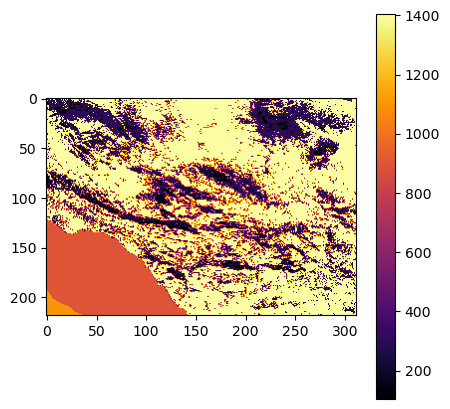

<Figure size 500x500 with 0 Axes>

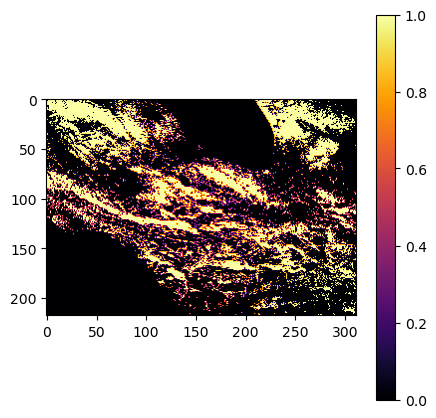

{(277, 36): 78, (43, 72): 76, (41, 74): 75, (176, 109): 74, (188, 108): 73, (245, 102): 73, (155, 139): 73, (203, 115): 72, (278, 36): 72, (44, 75): 70, (43, 75): 70, (268, 79): 70, (134, 141): 70, (271, 87): 70, (11, 115): 69, (119, 145): 69, (202, 115): 69, (103, 117): 69, (45, 73): 69, (44, 73): 69, (41, 85): 69, (203, 109): 69, (109, 141): 68, (199, 159): 68, (267, 75): 68, (27, 70): 68, (175, 109): 68, (202, 109): 68, (204, 109): 68, (109, 142): 67, (163, 105): 67, (245, 122): 67, (246, 122): 67, (89, 132): 67, (29, 68): 67, (216, 114): 67, (33, 64): 67, (31, 66): 67, (152, 138): 66, (134, 62): 66, (118, 145): 66, (277, 118): 66, (201, 115): 66, (220, 198): 66, (46, 73): 66, (128, 56): 66, (269, 83): 66, (120, 49): 65, (136, 64): 65, (133, 141): 65}


In [45]:
# starting from working version
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, hab_mat, unrestorable)

def get_greedy_flow_pixels(optimizer, flow, n=None):
    if (n == None):
        n = optimizer.pixels
    flow = flow.squeeze(0)
    total_px = flow.shape[0] * flow.shape[1]
    flat_indices = np.argpartition(flow.ravel(), -total_px)[-total_px:]
    row_indices, col_indices = np.unravel_index(flat_indices, flow.shape)

    min_elements = flow[row_indices, col_indices]
    min_elements_order = np.argsort(min_elements)
    row_indices, col_indices = row_indices[min_elements_order], col_indices[min_elements_order]

    highest_flow = {}
    with GeoTiff.from_file(optimizer.terrain_fn) as terr:
        raw_terrain = terr.get_all_as_tile().m.squeeze(0)
        terr.draw_geotiff()
    with GeoTiff.from_file(optimizer.habitat_fn) as hab:
        raw_hab = hab.get_all_as_tile().m.squeeze(0)
        hab.draw_geotiff()

    i = total_px
    while (len(highest_flow.items()) < n and i > 0):
        stack = [(col_indices[i-1], row_indices[i-1])]
        col, row = col_indices[i-1], row_indices[i-1]
        # while len(stack) > 0:
        #     print(stack)
        #     col, row = stack.pop()
        terrain = raw_terrain[row][col]
        permiability = optimizer.permeability_dict[terrain]
        if permiability < 1: #and raw_hab[row][col] != 1:
            highest_flow[(col, row)] = flow[row][col]
        #         # find highest grad of neighbors and push to stack
        #         max_neighbor = ()
        #         max_neighbor_flow = 0
        #         for neighbor_col, neighbor_row in [(col - 1, row), (col + 1, row), (col, row - 1), (col, row + 1), (col - 1, row - 1), (col + 1, row + 1), (col - 1, row + 1), (col + 1, row - 1)]:
        #             if neighbor_col >= 0 and neighbor_col < flow.shape[1] and neighbor_row >= 0 and neighbor_row < flow.shape[0]:
        #                 neighbor_flow = flow[neighbor_row][neighbor_col]
        #                 if neighbor_flow > max_neighbor_flow and (neighbor_col, neighbor_row) not in highest_flow:
        #                     print(neighbor_flow)
                            
        #                     max_neighbor = (neighbor_col, neighbor_row)
        #                     max_neighbor_flow = neighbor_flow
        #         if max_neighbor_flow > 0:
        #             stack.append(max_neighbor)
        #     else:
        #         break
        i -= 1
    return highest_flow

with GeoTiff.from_file(flowOptimizer.habitat_fn) as hab:
    hab_m = hab.get_all_as_tile().m
with GeoTiff.from_file(flowOptimizer.flow_fn) as flow_tif:
    flow = flow_tif.get_all_as_tile().m

# flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
highest_flow = get_greedy_flow_pixels(flowOptimizer, flow)
print(highest_flow)

In [ ]:
# starting from working version
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 100, hab_mat, unrestorable)

def get_greedy_flow_pixels(optimizer, flow, n=None, number_corridors=None):
    if (n == None):
        n = optimizer.pixels
    flow = flow.squeeze(0)
    total_px = flow.shape[0] * flow.shape[1]
    flat_indices = np.argpartition(flow.ravel(), -total_px)[-total_px:]
    row_indices, col_indices = np.unravel_index(flat_indices, flow.shape)

    min_elements = flow[row_indices, col_indices]
    min_elements_order = np.argsort(min_elements)
    row_indices, col_indices = row_indices[min_elements_order], col_indices[min_elements_order]

    highest_flow = {}
    with GeoTiff.from_file(optimizer.terrain_fn) as terr:
        raw_terrain = terr.get_all_as_tile().m.squeeze(0)
        terr.draw_geotiff()
    with GeoTiff.from_file(optimizer.habitat_fn) as hab:
        raw_hab = hab.get_all_as_tile().m.squeeze(0)
        hab.draw_geotiff()

    i = total_px
    stack = []
    seen = []
    while len(stack) < number_corridors:
        terrain = raw_terrain[row_indices[i-1]][col_indices[i-1]]
        permiability = optimizer.permeability_dict[terrain]
        if permiability < 1 and raw_hab[row_indices[i-1]][col_indices[i-1]] != 1:
            stack.append((col_indices[i-1], row_indices[i-1]))
        i -= 1
    while (len(highest_flow.items()) < n and len(stack) > 0):
        while len(stack) > 0:
            print(stack)
            col, row = stack.pop()
            terrain = raw_terrain[row][col]
            permiability = optimizer.permeability_dict[terrain]
            if permiability < 1 and raw_hab[row][col] != 1: # on start-up, has the propensity to not register raw_hab[row][col] != 1 as true
                highest_flow[(col, row)] = flow[row][col]
                # find highest grad of neighbors and push to stack
                max_neighbor = ()
                max_neighbor_flow = 0
                for neighbor_col, neighbor_row in [(col - 1, row), (col + 1, row), (col, row - 1), (col, row + 1), (col - 1, row - 1), (col + 1, row + 1), (col - 1, row + 1), (col + 1, row - 1)]:
                    if neighbor_col >= 0 and neighbor_col < flow.shape[1] and neighbor_row >= 0 and neighbor_row < flow.shape[0]:
                        neighbor_flow = flow[neighbor_row][neighbor_col]
                        if neighbor_flow > max_neighbor_flow and (neighbor_col, neighbor_row) not in highest_flow:
                            max_neighbor = (neighbor_col, neighbor_row)
                            max_neighbor_flow = neighbor_flow
                if max_neighbor_flow > 0:
                    stack.append(max_neighbor)
            else:
                break
        i -= 1
    return highest_flow

with GeoTiff.from_file(flowOptimizer.habitat_fn) as hab:
    hab_m = hab.get_all_as_tile().m
with GeoTiff.from_file(flowOptimizer.flow_fn) as flow_tif:
    flow = flow_tif.get_all_as_tile().m

# flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
highest_flow = get_greedy_flow_pixels(flowOptimizer, flow)
print(highest_flow)

In [14]:
flowOptimizer = flowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, hab_mat, unrestorable)

def get_bfs_flow_pixels(optimizer, flow, n=None, number_corridors=None):
    if (n == None):
        n = optimizer.pixels
    if (number_corridors == None):
        number_corridors = n / 5
    flow = flow.squeeze(0)
    total_px = flow.shape[0] * flow.shape[1]
    flat_indices = np.argpartition(flow.ravel(), -total_px)[-total_px:]
    row_indices, col_indices = np.unravel_index(flat_indices, flow.shape)

    min_elements = flow[row_indices, col_indices]
    min_elements_order = np.argsort(min_elements)
    row_indices, col_indices = row_indices[min_elements_order], col_indices[min_elements_order]

    highest_flow = {}
    with GeoTiff.from_file(optimizer.terrain_fn) as terr:
        raw_terrain = terr.get_all_as_tile().m.squeeze(0)
    with GeoTiff.from_file(optimizer.habitat_fn) as hab:
        raw_hab = hab.get_all_as_tile().m.squeeze(0)

    i = total_px
    stack = []
    seen = []
    while len(stack) < number_corridors:
        print(flow[row_indices[i-1]][col_indices[i-1]])
        terrain = raw_terrain[row_indices[i-1]][col_indices[i-1]]
        permiability = optimizer.permeability_dict[terrain]
        if permiability < 1 and raw_hab[row_indices[i-1]][col_indices[i-1]] != 1:
            stack.append((col_indices[i-1], row_indices[i-1]))
        i -= 1
    while (len(highest_flow.items()) < n and len(stack) > 0):
        col, row = stack.pop(0)
        seen.append((col, row))
        terrain = raw_terrain[row][col]
        permiability = optimizer.permeability_dict[terrain]
        if permiability < 1 and raw_hab[row][col] != 1:
            highest_flow[(col, row)] = flow[row][col]
            # find highest grad of neighbors and push to stack
            max_neighbor = ()
            max_neighbor_flow = 0
            for neighbor_col, neighbor_row in [(col - 1, row), (col + 1, row), (col, row - 1), (col, row + 1), (col - 1, row - 1), (col + 1, row + 1), (col - 1, row + 1), (col + 1, row - 1)]:
                if neighbor_col >= 0 and neighbor_col < flow.shape[1] and neighbor_row >= 0 and neighbor_row < flow.shape[0]:
                    neighbor_flow = flow[neighbor_row][neighbor_col]
                    if neighbor_flow > max_neighbor_flow and (neighbor_col, neighbor_row) not in highest_flow and (neighbor_col, neighbor_row) not in seen and (neighbor_col, neighbor_row) not in stack and optimizer.permeability_dict[raw_terrain[row][col]] < 1 and raw_hab[row][col] != 1: 
                        # limited neighbors in highest_flow
                        neighbors_of_neighbors_in_highest_flow = [x for x in [(neighbor_col - 1, neighbor_row), (neighbor_col + 1, neighbor_row), (neighbor_col, neighbor_row - 1), (neighbor_col, neighbor_row + 1), (neighbor_col - 1, neighbor_row - 1), (neighbor_col + 1, neighbor_row + 1), (neighbor_col - 1, neighbor_row + 1), (neighbor_col + 1, neighbor_row - 1)] if x in highest_flow]
                        if len(neighbors_of_neighbors_in_highest_flow) > 3:
                            break
                        max_neighbor = (neighbor_col, neighbor_row)
                        max_neighbor_flow = neighbor_flow
            if max_neighbor_flow > 0:
                stack.append(max_neighbor)
            else:
                stack.append((col_indices[i-1], row_indices[i-1]))
                i -= 1
        # else:
        #     stack.append((col_indices[i-1], row_indices[i-1]))
        #     i -= 1
    return highest_flow

with GeoTiff.from_file(flowOptimizer.flow_fn) as flow_tif:
    flow = flow_tif.get_all_as_tile().m

# flowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
highest_flow = get_bfs_flow_pixels(flowOptimizer, flow)
print(highest_flow)

140
140
140
140
140
140
140
140
140
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138


In [42]:
print(len(highest_flow))

100


In [11]:
TERRAIN_CHANGED_GREEDY = os.path.join(DATA_PATH, "smol/changed_terrain_flow_bfs.tif")

flowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_GREEDY, highest_flow, value=1)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
